# Foundations of Computational Economics #14

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Vectors and matrixes (Numpy)

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/QLp3PEziRJE](https://youtu.be/QLp3PEziRJE)

Description: NumPy arrays data types and differences to native Python, operations on the arrays, solving linear systems of equations.

### Scientific stack in Python

Collection of modules (libraries) used in scientific numerical computations:

- **``NumPy``** is widely-used scientific computing package for implements fast array processing — vectorization  
- **``SciPy``** is a collection of functions that perform common scientific operations (optimization, root finding, interpolation, numerical integration, etc.)  
- **``Pandas``** is data manipulation package with special data types and methods  
- **``Numba``** is just in time (JIT) compiler for a subset of Python and NumPy functions  
- **``Matplotlib``** serves for making figures and plots  

### NumPy library

<img src="_static/img/numpy_logo.png" style="width:512px;">

- **Vectorization in Python**  
- **NumPy** is a widely-used scientific computing package for brings fast array processing to Python  
- Reference guide: [https://docs.scipy.org/doc/numpy/reference/](https://docs.scipy.org/doc/numpy/reference/)  
- Runs fast compiled code written in C & Fortran under the hood  

#### Importing modules in Python

- `import LIBRARY as ref`, then call library functions as `ref.function`  
- `from LIBRARIY import function` or `from LIBRARIY import *`, then call library functions directly  
- keeping conventional reference is a good idea for making your code understood by others!  

In [1]:
# import libraries
import numpy as np

#### Power of NumPy

In [2]:
N = 1000000
data_list = list(range(N)) # Native Python list
t1 = %timeit -n10 -r10 -o mean1 = sum(data_list)/N

import numpy as np
data_array = np.array(range(N)) #NumPy array
t2 = %timeit -n10 -r10 -o mean2 = data_array.mean()

print('NumPy is on avarage %2.3f faster' % (t1.average/t2.average))

3.44 ms ± 112 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
312 µs ± 12.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
NumPy is on avarage 11.050 faster


In my computer Numpy is on average 11 times faster!!!

SI orders of magnitude https://en.wikipedia.org/wiki/Micro-

#### Scientific computing: more advanced treatment of numbers

Inherited from low lever C implementation

- int8, uint8 (signed and unsigned)  
- int16, uint16  
- int32, uint32  
- float16  
- float32  
- float64  


Full list of types:
[https://numpy.org/doc/stable/user/basics.types.html](https://numpy.org/doc/stable/user/basics.types.html)

#### Array initialization with type

In [ ]:
import sys
x = np.array([-1,0,1.4],dtype='bool')
y = np.array([-1,0,1.4],dtype='int16')
z = np.array([-1,0,1.4],dtype='float64')
print('x %s, takes %d bytes' % (type(x[0]),sys.getsizeof(x)))
print('y %s, takes %d bytes' % (type(y[0]),sys.getsizeof(y)))
print('z %s, takes %d bytes' % (type(z[0]),sys.getsizeof(z)))

NumPy array hold data of **the same type**

#### Integer overflow

In [ ]:
x = np.array([0,0,0],dtype='uint8')
x[0] = 255
x[1] = x[0] + 1
x[2] = x[1] + 1
print(x)

#### Infinity and not-a-number

In [ ]:
# Inf and NaN
# np.seterr(all=None, divide='ignore', over=None, under=None, invalid='ignore')
x = np.array([-1,0,1,10],dtype='float64')
print( x / 0 )
# y = 10 / 0 # core Python

In [ ]:
# Comparing nans and infs
a = (np.inf == np.inf)
b = (np.nan == np.nan)  # Can not compare nan to nan!
c = np.isnan(np.nan)
print (a, b, c)

Unlike in Math, $\infty$ can be compared but NaN can't be, as we have to use a simillar function to isinstance to check if a number is NaN

In [9]:
#Test how lists work
ls = [0]
ls = [0] * 2
len(ls)

2

#### What is inside array?

First, import module `obj_explore.py`: this is not trivial because jupyter notebooks require imported modules to be on the known `PATH`

In [10]:
# add path to the modules directory
import sys
sys.path.insert(1, './_static/include/')
# import the obj_explore() function
from obj_explore import *

In [4]:
a = np.array([1,2,3,4,5],dtype='float64')
# a = np.arange(5,dtype='uint8') + 1
print([type(a_element) for a_element in a])
a

[<class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>]


array([1., 2., 3., 4., 5.])

In [11]:
obj_explore(a,'public')
# help(a)

[1. 2. 3. 4. 5.]
------------------------------------------------------------
Object report on object = array([1., 2., 3., 4., 5.])
Objec class     : <class 'numpy.ndarray'>
Parent classes  : <class 'object'>
Occupied memory : 152 bytes
PUBLIC PROPERTIES
T               = array([1., 2., 3., 4., 5.]) <class 'numpy.ndarray'>
base            = None <class 'NoneType'>
ctypes          = <numpy.core._internal._ctypes object at 0x117748690> <class 'numpy.core._internal._ctypes'>
data            = <memory at 0x117460640> <class 'memoryview'>
dtype           = dtype('float64') <class 'numpy.dtypes.Float64DType'>
flags           =   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
 <class 'numpy.core.multiarray.flagsobj'>
flat            = <numpy.flatiter object at 0x1048b0000> <class 'numpy.flatiter'>
imag            = array([0., 0., 0., 0., 0.]) <class 'numpy.ndarray'>
itemsize        = 8 <class 'int'>
nbytes          = 40

#### Memory footprint

In [12]:
import sys
def memory_usage(var,grow,steps=10):
    """Returns data on memory usage when var is grown using supplied function for given number of steps"""
    d={"x":[],"y":[],"v":[]} # dictionary for x, y data, and values
    for i in range(steps):
        var=grow(var) # next value
        d["v"].append(var)
        d["x"].append(i+1)
        d["y"].append(sys.getsizeof(var))
    return d

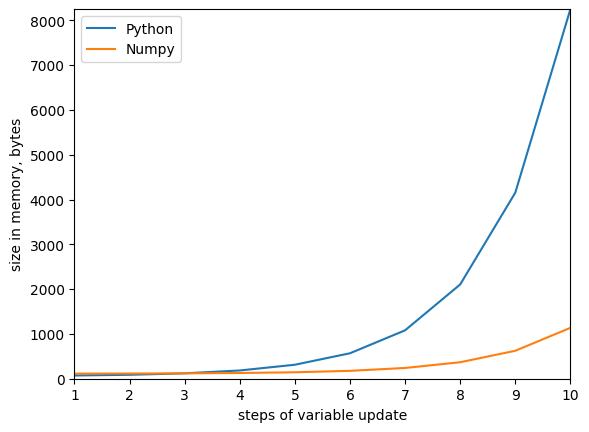

In [13]:
x = [0,] # Python list
grow = lambda x: [0,]*len(x)*2
d1 = memory_usage(x,grow,steps=10)
x = np.array([0])
grow = lambda x: np.array([0,]*x.size*2,dtype='int8')
d2 = memory_usage(x,grow,steps=10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(d1["x"],d1["y"],label='Python')
plt.plot(d2["x"],d2["y"],label='Numpy')
plt.axis([min(d1["x"]),max(d1["x"]),0,max(d1["y"])+1])
plt.ylabel('size in memory, bytes')
plt.xlabel('steps of variable update')
plt.legend()
plt.show()

#### Creating arrays

- From lists  
- Using functions for standard cases  

In [ ]:
a = np.array([1,3,5.0,7])
print(a)

In [ ]:
a = np.empty(25,'int8')  # not initialized !
b = np.zeros(5)          # initialized with zeros
c = np.ones(5)
d = np.arange(10)
e = np.linspace(2, 3, 11) # fill between 2 and 3 with 10 points
print(a,b,c,d,e,sep='\n\n')

Note that uninitialized array may have garbage (random state of the memory)

#### Matrices and multidimensional arrays

In [15]:
a = np.eye(5) # identity matrix
b = np.ones((2,3))
print(a)
print(b)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [16]:
b=b+2
c = np.asmatrix(b) # matrix !
print(b)
print(type(b))
print(c)
print(type(c))

[[3. 3. 3.]
 [3. 3. 3.]]
<class 'numpy.ndarray'>
[[3. 3. 3.]
 [3. 3. 3.]]
<class 'numpy.matrix'>


In [ ]:
print(b)
print(b*b) # element by element
print(c*c) # matrix multiplication

In [17]:
# c*c
print(c*c.transpose())

[[27. 27.]
 [27. 27.]]


#### Indexing into arrays

Several types of indexes:

- scalar index x[0] (getitem)  
- slicing like strings x[1::2]  
- numerical indexing  
- masks  

In [25]:
z = np.linspace(0, 2, 15) #creates a np array of 15 items, from 0 to 2 with equal spaces in between, it includes the first and last item so we get 13 spaces in between
z = np.reshape(z,[5,3]) # reshapes the array into 5 rows and 3 colums
print(z)

[[0.         0.14285714 0.28571429]
 [0.42857143 0.57142857 0.71428571]
 [0.85714286 1.         1.14285714]
 [1.28571429 1.42857143 1.57142857]
 [1.71428571 1.85714286 2.        ]]


In [24]:
print(z,end='\n\n')
print( z[1]      )   # scalar index: returns row array
print( z[1,0]    )   # scalar index: returns number
print( z[-1:]    )   # slicing: returns ?
print( z[1:3,1]  )   # slicing + scalar index
print( z[1:3,1:] )   # slicing
print( z[:,1]    )   # slicing to get the column
print(z[:,1:2]) # saving the dimensions of the array and getting it as a colum and not as a row

[[0.         0.18181818 0.36363636]
 [0.54545455 0.72727273 0.90909091]
 [1.09090909 1.27272727 1.45454545]
 [1.63636364 1.81818182 2.        ]]

[0.54545455 0.72727273 0.90909091]
0.5454545454545454
[[1.63636364 1.81818182 2.        ]]
[0.72727273 1.27272727]
[[0.72727273 0.90909091]
 [1.27272727 1.45454545]]
[0.18181818 0.72727273 1.27272727 1.81818182]
[[0.18181818]
 [0.72727273]
 [1.27272727]
 [1.81818182]]


In [22]:
# Assigning elements of an array
z[1,0] = -1
z[2] = [4,5,7]  # assign whole row from a list
z[:,0] = np.array([4.2,5.2,6.2,7.2,8.2]) # assign column from nparray
z[:2,1]=9.3
z[3][1]=-2 # note double bracket indexing
print(z)
z[3][1] == z[3,1]

[[ 4.2         9.3         0.28571429]
 [ 5.2         9.3         0.71428571]
 [ 6.2         5.          7.        ]
 [ 7.2        -2.          1.57142857]
 [ 8.2         1.85714286  2.        ]]


True

In [28]:
z = np.linspace(0, 2, 12)
z = np.reshape(z,[4,3])
print(z,end='\n\n')

print( z[[0,2,2],[0,1,0]]    )   # numerical (element by element) indexing, will print the following elements [0,1] , [2,1] , [2,0]
print( z[z>1.0]              )   # boolean indexing (masking)
mask = np.logical_and(z>1.0,z<1.75)
print(mask,end='\n\n')
print( z[mask]               )   # boolean indexing (masking)

[[0.         0.18181818 0.36363636]
 [0.54545455 0.72727273 0.90909091]
 [1.09090909 1.27272727 1.45454545]
 [1.63636364 1.81818182 2.        ]]

[0.         1.27272727 1.09090909]
[1.09090909 1.27272727 1.45454545 1.63636364 1.81818182 2.        ]
[[False False False]
 [False False False]
 [ True  True  True]
 [ True False False]]

[1.09090909 1.27272727 1.45454545 1.63636364]


#### Operation broadcasting

<img src="_static/img/broadcasting.png" style="width:800px;">

#### Operation broadcasting

In [29]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + 10)
print(a + b)

[11 12 13]
[5 7 9]


In [30]:
x = np.arange(3) + 5
y = np.ones((3,3))
print(x,y,x+y,sep='\n\n')

[5 6 7]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[6. 7. 8.]
 [6. 7. 8.]
 [6. 7. 8.]]


In [33]:
# x = np.arange(5).reshape((5,1))  # or
x = np.arange(5)[:,np.newaxis]
print(x,end='\n\n')
print(x.transpose(),end='\n\n')
print(x + x.transpose())

[[0]
 [1]
 [2]
 [3]
 [4]]

[[0 1 2 3 4]]

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


In [42]:
x = np.arange(12).reshape((3,4))
y = np.arange(4)
print(x,y,x+y,sep='\n\n')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[0 1 2 3]

[[ 0  2  4  6]
 [ 4  6  8 10]
 [ 8 10 12 14]]


##### Broadcasting works with:

- addition ($ + $)  
- subtraction ($ - $)  
- multiplication ($ * $)  
- division ($ / $)  
- integer division ($ // $)  
- power ($ ** $)  
- all *universal functions*  

#### ufunc

Functions provided by NumPy which support vectorization and broadcasting

- Act on array element-wise  
- Efficient implementation with low level code  


[https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

In [37]:
import math
N = 10000
data_list = list(range(N)) # Native Python list
t1 = %timeit -n10 -r10 -o sin1 = [math.sin(x) for x in data_list]

import numpy as np
data_array = np.array(range(N)) #NumPy array
t2 = %timeit -n10 -r10 -o sin2 = np.sin(data_array)

print('NumPy is on avarage %2.3f faster' % (t1.average/t2.average))

429 µs ± 12.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
37.8 µs ± 11.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
NumPy is on avarage 11.354 faster


#### Reduction operations

Functions that return the array of reduced size: **sum**, **min**,
**max** , **mean**, **all**, **any**

[https://numpy.org/doc/stable/reference/routines.math.html](https://numpy.org/doc/stable/reference/routines.math.html)

In [61]:
x = np.arange(12).reshape(4,3)
print(x)
print(np.sum(x))
print(np.sum(x, axis=1))
print(np.maximum.reduce(x,axis=1,keepdims=True))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
66
[ 3 12 21 30]
[[ 2]
 [ 5]
 [ 8]
 [11]]


In [63]:
x = np.arange(24).reshape(2,4,3)
print(x)
y = np.min(x,axis=1)
# y = np.mean(x,axis=(1,2))
print(y.shape)
print(y)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]
(2, 3)
[[ 0  1  2]
 [12 13 14]]


In [71]:
a = np.arange(100).reshape(2,2,5,5)
print(a)
b = np.min(a,axis = 3 )
print(b)

[[[[ 0  1  2  3  4]
   [ 5  6  7  8  9]
   [10 11 12 13 14]
   [15 16 17 18 19]
   [20 21 22 23 24]]

  [[25 26 27 28 29]
   [30 31 32 33 34]
   [35 36 37 38 39]
   [40 41 42 43 44]
   [45 46 47 48 49]]]


 [[[50 51 52 53 54]
   [55 56 57 58 59]
   [60 61 62 63 64]
   [65 66 67 68 69]
   [70 71 72 73 74]]

  [[75 76 77 78 79]
   [80 81 82 83 84]
   [85 86 87 88 89]
   [90 91 92 93 94]
   [95 96 97 98 99]]]]
[[[ 0  5 10 15 20]
  [25 30 35 40 45]]

 [[50 55 60 65 70]
  [75 80 85 90 95]]]


#### References and mutability

NumPy tries not to copy data in the arrays when not necessary

- principle: whether it is possible to maintain simple pointer arithmetic  
- slices are generally not copied  
- numerical indexing/mask generally copied  
- **.flags** to check  
- **.copy** to make a true copy  

In [73]:
x = np.arange(12).reshape(4,3) # 2-dim array
print(x)
y = x[:,1:2]
print(y)
print(y.flags)
y[0] = 999
print(x)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 1]
 [ 4]
 [ 7]
 [10]]
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

[[  0 999   2]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]]


$Y$ is a pointer to specific elemnts in $x$, that's why when we changed an element in $y$, it changes also in $x$.

In [ ]:
y = x[[0,1],[0,2]]
print(y)
print(y.flags)
y[0]=-100
print(x)

[https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flags.html](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flags.html)

### Linear algebra with NumPy

Submodule numpy.linalg

- matrix decompositions  
- eigenvalues  
- determinant, rank  
- matrix inverse  
- linear systems of equations  


[https://numpy.org/doc/stable/reference/routines.linalg.html](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [ ]:
import numpy.linalg as linalg
obj_explore(linalg,'public methods')

#### Matrix operations

$$
A=
\begin{pmatrix}
1 & 2 & 0 & 5 \\
4 & -2 & 1 & 1 \\
0 & 0 & -2 & 7 \\
3 & 1 & 4 & 0 \\
\end{pmatrix}
$$

In [ ]:
A = np.array([[1,2,0,5],[4,-2,1,1],[0,0,-2,7],[3,1,4,0]])
print(A)

In [ ]:
print(A,end='\n\n')
# print( A.transpose() )
# print( np.linalg.matrix_rank(A) )
# print( np.linalg.inv(A) )
# print( np.linalg.det(A) )
B = A[:2,:]
# print(B,end='\n\n')
# print( B * B ) # element by element
# print( B @ B ) # matrix multiplication
# print( B @ B.T )

#### Linear systems of equations

$$
\begin{eqnarray*}
1x_1+2x_2+5x_4&=&5\\
4x_1-2x_2+x_3+x_4&=&5\\
-2x_3+7x_4&=&0\\
3x_1+x_2+4x_3&=&-3\\
\end{eqnarray*}
$$

In matrix notation $ Ax=b $ where

$$
A=
\begin{pmatrix}
1 & 2 & 0 & 5 \\
4 & -2 & 1 & 1 \\
0 & 0 & -2 & 7 \\
3 & 1 & 4 & 0 \\
\end{pmatrix},\;\;
b=\begin{pmatrix}
5\\
5\\
0\\
-3
\end{pmatrix},\;\;
x=\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{pmatrix}
$$

In [ ]:
b = np.array([5,5,0,-3])
x=np.linalg.solve(A, b)
print('Solution is %r' % x)
print('Check: max(Ax-b) = %1.5e' % np.max(A@x-b))

#### Overdetermined linear systems of equations

$$
\begin{eqnarray*}
1x_1+2x_2&=&5\\
4x_1-2x_2+x_3&=&5\\
-2x_3&=&0\\
3x_1+x_2+4x_3&=&-3\\
\end{eqnarray*}
$$

In [ ]:
A = np.array([[1,2,0],[4,-2,1],[0,0,-2],[3,1,4]])
x=np.linalg.lstsq(A, b, rcond=None)

A = np.array([[1,2,0],[4,-2,1],[0,0,-2],[3,1,4]])
x,*_=np.linalg.lstsq(A, b, rcond=None) # ignore all outputs except the first
print(A)
print('Solution is %r' % x)
print('Check: max(Ax-b) = %1.5e' % np.max(A@x-b))
# help(np.linalg.lstsq)

#### Market equilibrium in a linear model

- Prices $ p $, quantities $ q $  
- $ n $ goods in the economy  
- Linear demand $ D(p) = A p + d $, where $ A $ is n by n, and
  $ p $ is n by 1  
- Linear supply $ S(p) = B p + s $, where $ B $ is n by n, and
  $ p $ is n by 1  
- Market clearing prices: $ D(p)=S(p) $  

In [ ]:
def random_matrix(n,positive=True,maxeigen=10):
    '''Generates square random positive/negative semi-definite matrix'''
    e=np.random.uniform(0,maxeigen,n) # random eigenvalues
    r=np.random.uniform(0,1,n*n).reshape(n,n) # rotation
    e = e if positive else -e
    A = np.diag(e)  # diagonal matrix with
    return r @ A @ r.T  # positive/negative semi-definite
n = 3  # number of products
A = random_matrix(n,positive=False)  # demand
d = np.array([100,]*n)
B = random_matrix(n)  # supply
s = np.zeros(n)
p = np.linalg.solve(A-B, s-d)  # solve for quilibrium
q = A @ p + d # equilibrium quantities
print('Demand is given by Ap+d:\nA=%r\nd=%r' % (A,d))
print('Supply is given by Bp+s:\nB=%r\ns=%r' % (B,s))
print('Equilibrium prices are     p = {}'.format(p))
print('Equilibrium quantities are q = {}'.format(q))

### Further learning resources

- Reference manual for Numpy
  [https://numpy.org/doc/stable/reference/](https://numpy.org/doc/stable/reference/)  
- 📖 Kevin Sheppard “Introduction to Python for Econometrics, Statistics
  and Data Analysis.” *Chapters: 4, 6, 7, 8*  
- SciPy 2017 Tutorial on NumPy (2.5h)
  [https://www.youtube.com/watch?v=lKcwuPnSHIQ&ab_channel=Enthought](https://www.youtube.com/watch?v=lKcwuPnSHIQ&ab_channel=Enthought)  
- Essence of linear algebra playlist by 3Blue1Brown
  [https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)  